# Visualizing the Caribbean SST-rainfall relationship

In [1]:
# Package imports
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr


## Retrieve observations

In [ ]:
# Import ERSSTv5 data using xarray
car_sst = pd.read_csv('../data/monthly_caribbean_sst_index_1979to2024.csv', header='infer').set_index('time').to_xarray()['car_sst']
car_precip = pd.read_csv('../data/monthly_caribbean_prcp_index_1979to2024.csv', header='infer').set_index('time').to_xarray()['car_prcp']

# Convert time coordinate to datetime objects
car_sst['time'] = pd.to_datetime(car_sst['time'].values)
car_precip['time'] = pd.to_datetime(car_precip['time'].values)

## Calculate linear and nonlinear fit
Let's define the climate norms we're interested in visualizing. Below, we divide the full time period into two (1979-2001 and 2002-2024) and calculate the linear relationship between Caribbean rainfall and SSTs for each. 

In [ ]:
from scipy.optimize import curve_fit

# --- Define climate norms ---
clim_norm1 = np.arange(1979, 2001, 1)
clim_norm2 = np.arange(2002, 2025, 1)

# --- Remove nans ---
# Ensure car_sst and car_precip are xarray DataArrays
car_sst_values = car_sst.values[np.logical_not(np.isnan(car_sst.values))]
car_precip_values = car_precip.values[np.logical_not(np.isnan(car_precip.values))]

# Check if car_precip_values is empty
if car_precip_values.size == 0:
    print("Error: car_precip_values is empty after removing NaNs. Cannot perform curve fit.")
else:
    # --- Non-linear fit ---
    # Define the polynomial function for fitting
    def polynomial_func(x, a, b, c, d):
        return a * x**3 + b * x**2 + c * x + d

    # Perform the curve fitting
    popt, pcov = curve_fit(polynomial_func, car_sst_values, car_precip_values)

    # Extract the fitted coefficients
    a, b, c, d = popt

    # Generate x-values for the fitted curve
    x_fit = np.linspace(car_sst_values.min(), car_sst_values.max(), 100)

    # Calculate y-values for the fitted curve
    y_fit = polynomial_func(x_fit, a, b, c, d)

## Plot the schematic using data

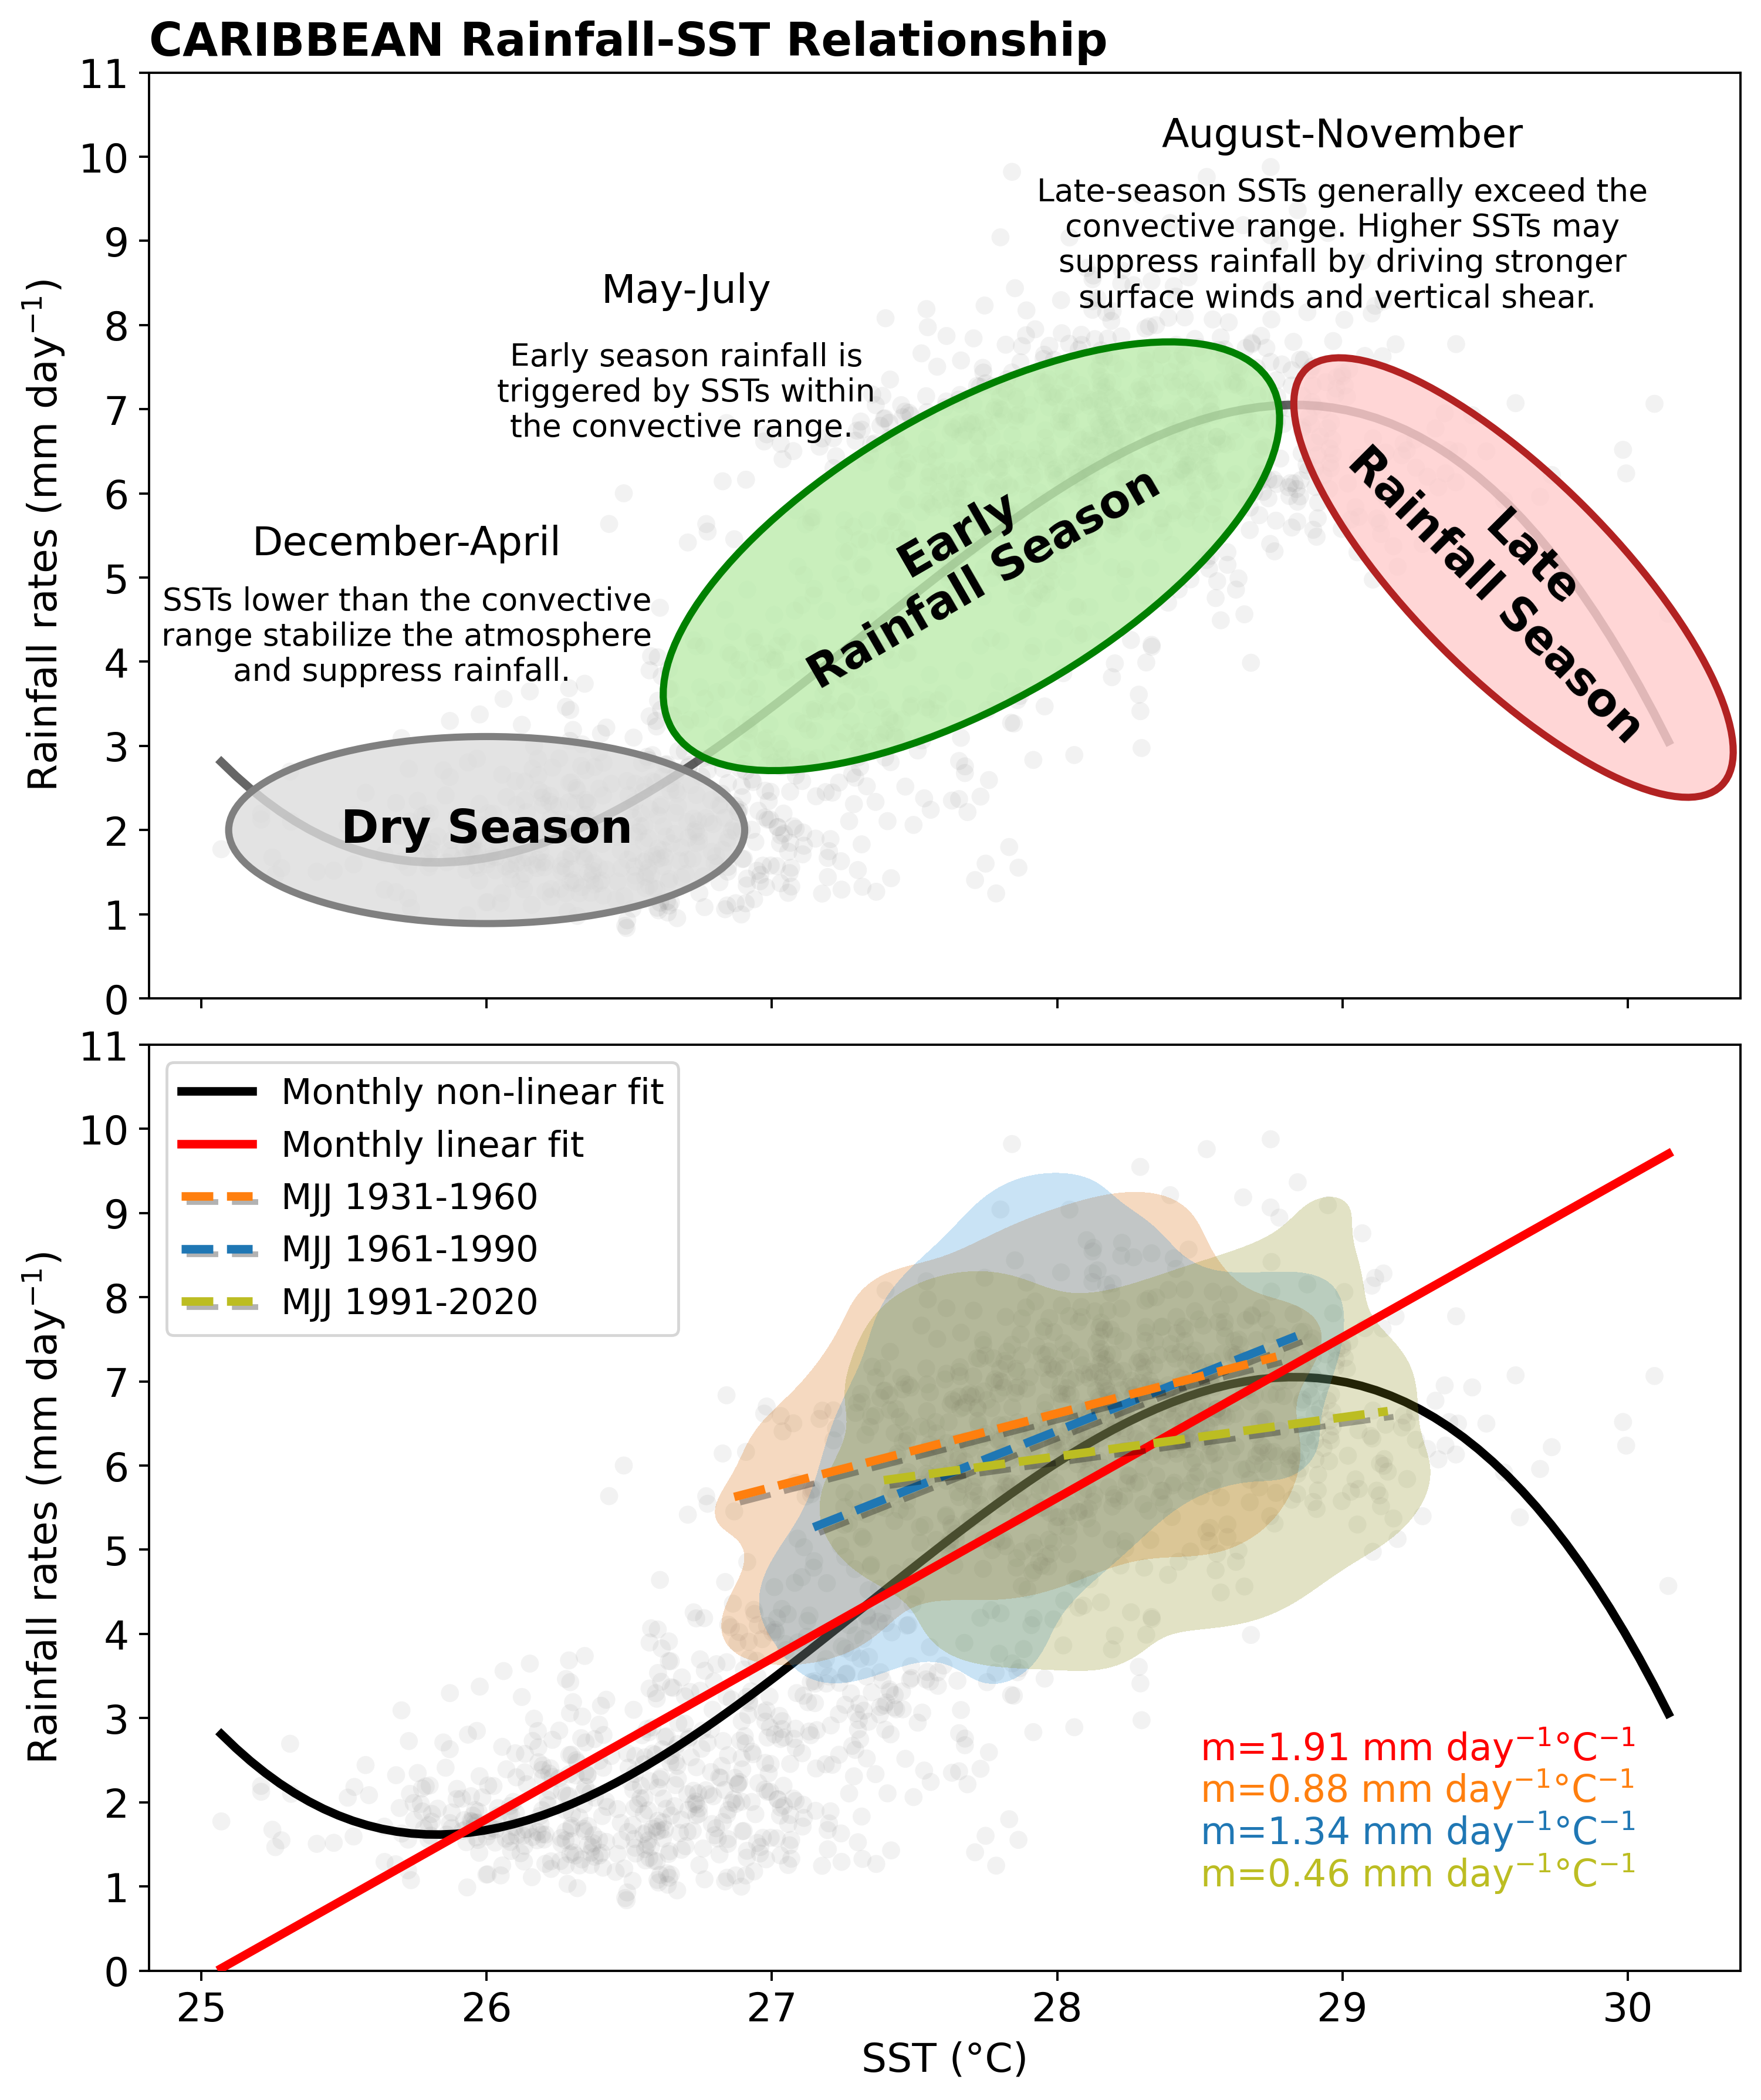

In [ ]:
# Generate code to plot the precipitation-sst plot above as a kernel density estimate plot using matplotlib.
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import scipy.odr as odr
from scipy.stats import linregress

from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

fig = plt.figure(figsize=(10, 12), dpi=350)

### --- 1ST SUBPLOT ---
ax1 = plt.subplot(211)
ax1.set_title('CARIBBEAN Rainfall-SST Relationship', loc='left', fontsize=16, fontweight='bold')
ax1.scatter(car_sst.values, car_precip.values, s=40, edgecolors='none', color='gray', alpha=0.1, zorder=1)

# Non-linear plot
ax1.plot(x_fit, y_fit, lw=3, ls='-', color='black', alpha=0.6, label='Monthly non-linear fit (1979-2024)')

# Bubbles and annotations
# dry season
ax1.text(26, 5.4, "December-April", size=14,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
ax1.text(26, 4.3, "SSTs lower than the convective\nrange stabilize the atmosphere\nand suppress rainfall. ", size=11,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)

# BUBBLE 1
ax1.text(26, 1.6, "Dry Season", size=14, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="ellipse",
                   pad=0.8,
                   ec="gray",
                   fc=(0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8),
                   lw=2.5,
                   mutation_aspect=1.2,
                   ),
         fontweight="bold"
         )

# early rainfall season
ax1.text(27.4, 8.3, "May-July", size=14,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
ax1.text(27.4, 7.1, "Early season rainfall is\ntriggered by SSTs within\nthe convective range. ", size=11,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)

# BUBBLE 2
ax1.text(28, 4.4, "Early\nRainfall Season", size=14, rotation=32.,
         ha="center", va="center",
         bbox=dict(boxstyle="ellipse",
                   pad=1.2,
                   ec="green",
                   fc=(0.7372549019607844, 0.9254901960784314, 0.6745098039215687, 0.8),
                   lw=2.5,
                   mutation_aspect=0.8,
                   ),
         fontweight="bold"
         )

# late rainfall season
ax1.text(29.5, 10.25, "September-November", size=14,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
ax1.text(29.5, 8.95, "Late-season SSTs generally exceed the\nconvective range. Higher SSTs may\nsuppress rainfall by driving stronger\nsurface winds and vertical shear. ", size=11,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)

# BUBBLE 3
ax1.text(30., 4.4,
         "Late\nRainfall Season", size=14, rotation=-45.,
         ha="center", va="center",
         bbox=dict(boxstyle="ellipse",
                   pad=0.2,
                   ec="firebrick",
                   fc=(1., 0.8, 0.8, 0.8),
                   lw=2.5,
                   mutation_aspect=2.5,
                   ),
         fontweight="bold"
         )

## Subfigure plot features
ax1.set_ylim(0,11)
ax1.set_xlim(25, 31)
ax1.set_yticks(np.arange(0, 12, 1))
ax1.tick_params(labelsize=14, labelbottom=False)
ax1.set_ylabel('Rainfall rates (mm day$^{-1}$)', fontsize=14)

# Add subplot label 'a'
ax1.text(0.02, 0.98, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')


### --- 2ND SUBPLOT ---
ax2 = plt.subplot(212)

# --- Scatter plot ---
ax2.scatter(car_sst.values, car_precip.values, s=40, edgecolors='none', color='gray', alpha=0.1, zorder=1)

ax2.plot(x_fit, y_fit, lw=3, ls='-', color='black', label='Monthly non-linear fit', zorder=1)

ax2.axhline(3.5, color='black', ls='--', lw=0.5, alpha=0.5)
ax2.axvline(27.6, color='black', ls='--', lw=0.5, alpha=0.5)

# --- Linear fit for all data ---
# # UNCOMMENT for monthly May-July values
# x = car_sst.sel(time=car_sst.time.dt.month.isin([5,6,7])).values
# y = car_precip.sel(time=car_precip.time.dt.month.isin([5,6,7])).values

x = car_sst.values
y = car_precip.values
xy = zip(x, y)
xy = np.array(sorted(xy, key = lambda x: x[0]))

slope, intercept, r_value, p_value, std_err = linregress(xy[:,0], xy[:,1])
trend_line = np.poly1d([slope, intercept])
ax2.plot(xy[:,0], trend_line(xy[:,0]), color='red', ls='-', lw=3, label='Monthly linear fit', zorder=3)

# Calculate R-squared value for trendline
r_squared = r_value**2

# Add annotations to lower right corner
ax2.annotate('m='+str(np.round(slope, decimals=2))+' mm day$^{-1}$°C$^{-1}$, R$^{2}$='+str(np.round(r_squared, 2)), xy=(28.3,2.), fontsize=13, color='red', fontweight='bold' if p_value < 0.05 else 'normal')

## --- Climate norm 1 ---
early_sst = car_sst.sel(time=car_sst.time.dt.year.isin(clim_norm1))
early_precip = car_precip.sel(time=car_precip.time.dt.year.isin(clim_norm1))
sns.kdeplot(x=early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, y=early_precip.sel(time=early_precip.time.dt.month.isin([5,6,7])).values, color='tab:orange', levels=2, fill=True, alpha=0.25, legend=True, ax=ax2)

# linear fit for norm 1
x = early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values
y = early_precip.sel(time=early_precip.time.dt.month.isin([5,6,7])).values
xy = zip(x, y)
xy = np.array(sorted(xy, key = lambda x: x[0]))

slope, intercept, r_value, p_value, std_err = linregress(xy[:,0], xy[:,1])
trend_line = np.poly1d([slope, intercept])
ax2.plot(xy[:,0], trend_line(xy[:,0]), color='tab:orange', lw=3, ls='--', label='MJJ 1979-2001', path_effects=[SimpleLineShadow(shadow_color="black", linewidth=2),Normal()], zorder=3)

# Calculate R-squared value for trendline
r_squared = r_value**2

# Add annotations to lower right corner
ax2.annotate('m='+str(np.round(slope, decimals=2))+' mm day$^{-1}$°C$^{-1}$, R$^{2}$='+str(np.round(r_squared, 2)), xy=(28.3,1.5), fontsize=13, color='tab:orange', fontweight='bold' if p_value < 0.05 else 'normal')

## --- Climate norm 2 ---
early_sst = car_sst.sel(time=car_sst.time.dt.year.isin(clim_norm2))
early_precip = car_precip.sel(time=car_precip.time.dt.year.isin(clim_norm2))
sns.kdeplot(x=early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, y=early_precip.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, color='tab:blue', levels=2, fill=True, alpha=0.25, ax=ax2)

# linear fit for norm 2
x = early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values
y = early_precip.sel(time=early_precip.time.dt.month.isin([5,6,7])).values
xy = zip(x, y)
xy = np.array(sorted(xy, key = lambda x: x[0]))

slope, intercept, r_value, p_value, std_err = linregress(xy[:,0], xy[:,1])
trend_line = np.poly1d([slope, intercept])
ax2.plot(xy[:,0], trend_line(xy[:,0]), color='tab:blue', lw=3, ls='--', label='MJJ 2002-2024', path_effects=[SimpleLineShadow(shadow_color="black", linewidth=2),Normal()])

# Calculate R-squared value for trendline
r_squared = r_value**2

# Add annotations to lower right corner
ax2.annotate('m='+str(np.round(slope, decimals=2))+' mm day$^{-1}$°C$^{-1}$, R$^{2}$='+str(np.round(r_squared, 2)), xy=(28.3,1.), fontsize=13, color='tab:blue', fontweight='bold' if p_value < 0.05 else 'normal')


## Subfigure features
ax2.set_ylim(0,11)
ax2.set_xlim(25, 31)
ax2.set_yticks(np.arange(0, 12, 1))
ax2.set_xlabel('SST (°C)', fontsize=14)
ax2.set_ylabel('Rainfall rates (mm day$^{-1}$)', fontsize=14)

ax2.tick_params(labelsize=14)
ax2.legend(loc='upper right', ncol=2, fontsize=12.5)

# Add subplot label 'b'
ax2.text(0.02, 0.98, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')


plt.subplots_adjust(hspace=0.05)
plt.show()

## --- Save figure ---
fig.savefig('../figures/figure1-sst-rainfall-schematic.pdf', dpi=300, format='pdf', bbox_inches='tight')